In [45]:
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [46]:
def parse_data(fname):
    data = ''
    with open(fname, 'r') as f:
        data = eval(f.read().strip())
    return data

In [47]:
def diff_data(data):
    pos = [i for i in data]
    new_pos_abs = []
    new_pos = []

    for i in range(len(pos) - 1):
        new_pos_abs.append(abs(pos[i+1] - pos[i]))
        new_pos.append(pos[i+1] - pos[i])

    return new_pos_abs, new_pos

In [48]:
def plot_2d(**kwargs):
    x = kwargs['x']
    y1 = kwargs['y1']
    y2 = kwargs['y2']
    ylabel_a = kwargs['ylabel']
    xlabel = kwargs['xlabel']
    title = kwargs['title']

#     plt.subplot(1, 1, 1)
    plt.plot(x, y1, '--', color='r', label='Cheat')
    plt.plot(x, y2, '-', color='g', label='No cheat')
    plt.title(title)
    plt.ylabel(ylabel_a)
    plt.xlabel(xlabel)
    plt.legend()

    plt.show()

In [49]:
base = os.getcwd()
cheat_data = parse_data(os.path.join(base, 'pong_data', 'cheat_data.json'))
no_cheat_data = parse_data(os.path.join(base, 'pong_data', 'data.json'))

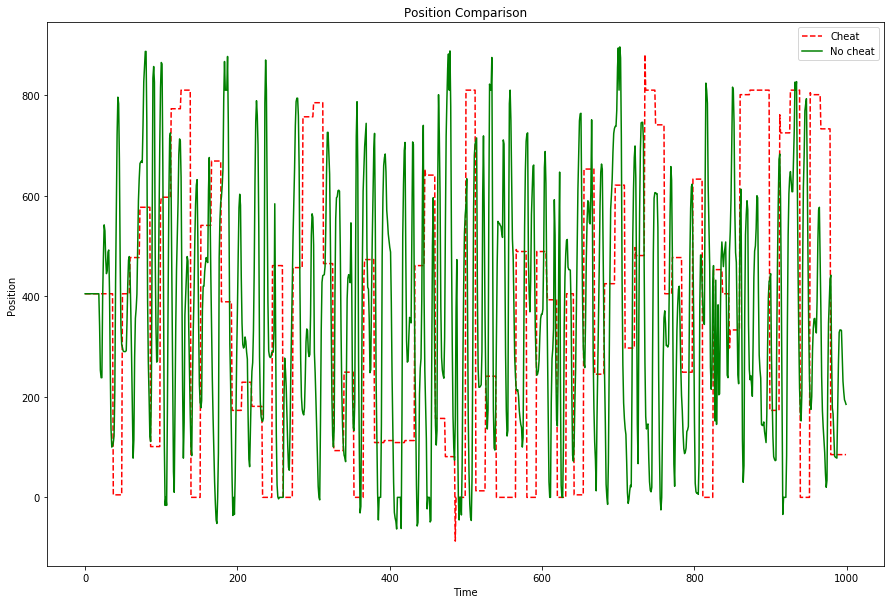

In [50]:
x, y1 = range(len(cheat_data)), cheat_data
_, y2 = range(len(no_cheat_data)), no_cheat_data
plot_2d(**{
    'x': x, 'y1': y1, 'y2': y2,
    'ylabel': 'Position', 'xlabel': 'Time', 'title': 'Position Comparison',
    'name': 'position.svg'
})

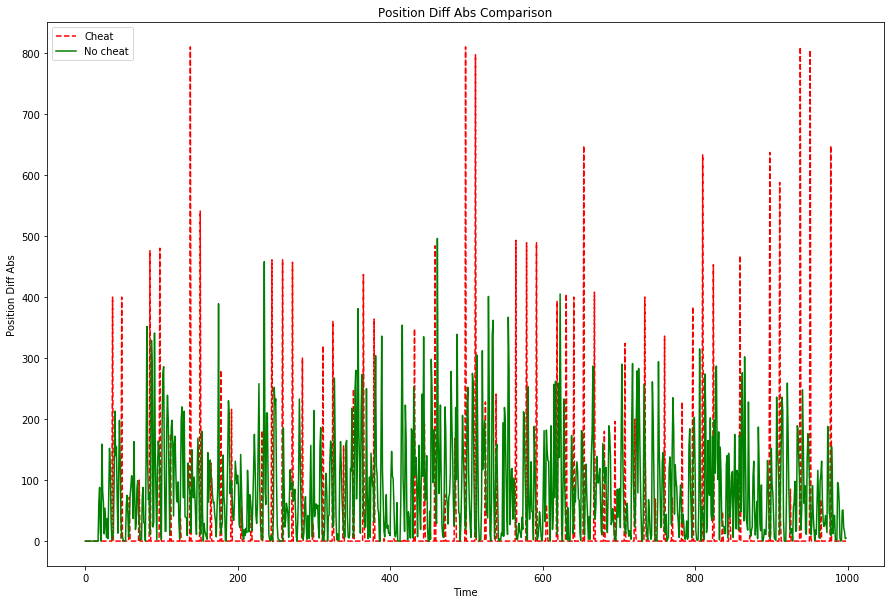

In [51]:
diff_abs_cheat, diff_cheat = diff_data(cheat_data)
diff_abs_no_cheat, diff_no_cheat = diff_data(no_cheat_data)

x, y1 = range(len(diff_abs_cheat)), diff_abs_cheat
_, y2 = range(len(diff_abs_no_cheat)), diff_abs_no_cheat
plot_2d(**{
    'x': x, 'y1': y1, 'y2': y2,
    'ylabel': 'Position Diff Abs', 'xlabel': 'Time', 'title': 'Position Diff Abs Comparison',
    'name': 'position_abs_diff.svg'
})

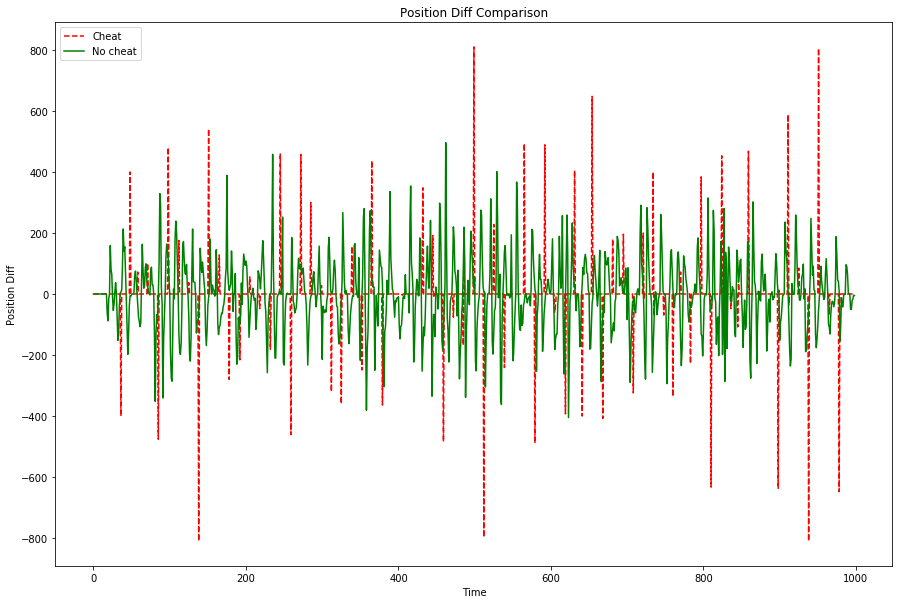

In [52]:
x, y1 = range(len(diff_cheat)), diff_cheat
_, y2 = range(len(diff_no_cheat)), diff_no_cheat
plot_2d(**{
    'x': x, 'y1': y1, 'y2': y2,
    'ylabel': 'Position Diff', 'xlabel': 'Time', 'title': 'Position Diff Comparison',
    'name': 'Position_diff.svg'
})

In [53]:
def get_features(data):
    stddev = np.std(data)
    mean = np.mean(data)

    _, diff = diff_data(data)

    stddev_diff = np.std(diff)
    mean_diff = np.mean(diff)

    return (
        stddev, mean, stddev_diff, mean_diff
    )

In [59]:
def plot_3d(cheat_data, no_cheat_data, title):
    xa = [i[2] for i in cheat_data]
    ya = [i[3] for i in cheat_data]
    za = [i[1] for i in cheat_data]

    xb = [i[2] for i in no_cheat_data]
    yb = [i[3] for i in no_cheat_data]
    zb = [i[1] for i in no_cheat_data]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(xa, ya, za, marker='o', color='r', label='Cheat')
    ax.scatter(xb, yb, zb, marker='^', color='g', label='No cheat')

    ax.set_xlabel('Standard Deviation')
    ax.set_ylabel('Mean')
    ax.set_zlabel('Standard Deviation Diff')

    plt.title(title)
    plt.legend()
    
    plt.show()

In [60]:
c_data = cheat_data
n_data = no_cheat_data

c_features = []
n_features = []

for i in range(0, len(c_data), 10):
    x = get_features(c_data[i:i+10])
    y = get_features(n_data[i:i+10])
    c_features.append(x)
    n_features.append(y)

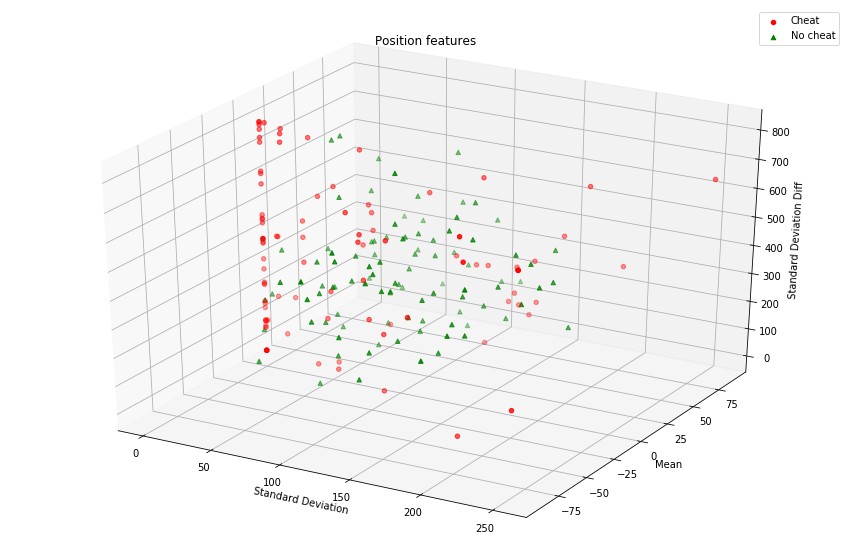

In [61]:
plot_3d(c_features, n_features, 'Position features')

In [62]:
c_min = min(c_data)
c_max = max(c_data)
n_min = min(n_data)
n_max = max(n_data)

normalised_c_data = list(map(lambda x: (x - c_min) / (c_max - c_min), c_data))
normalised_n_data = list(map(lambda x: (x - n_min) / (n_max - n_min), n_data))

normalised_c_features = []
normalised_n_features = []

for i in range(0, len(normalised_c_data), 10):
    x = get_features(normalised_c_data[i:i+10])
    y = get_features(normalised_n_data[i:i+10])
    normalised_c_features.append(x)
    normalised_n_features.append(y)

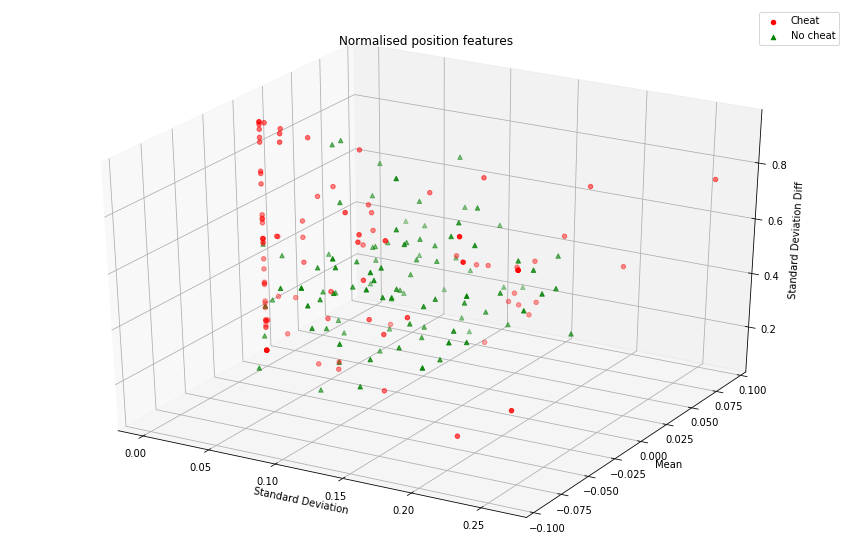

In [63]:
plot_3d(normalised_c_features, normalised_n_features, 'Normalised position features')